In [94]:
import pandas as pd
import numpy as np
df=pd.read_csv('Real estate.csv')

In [95]:
df.shape

(414, 8)

In [96]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [97]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [98]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [99]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [100]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [101]:
df.drop(['X1 transaction date','No'],axis=1,inplace=True)

<Axes: ylabel='X2 house age'>

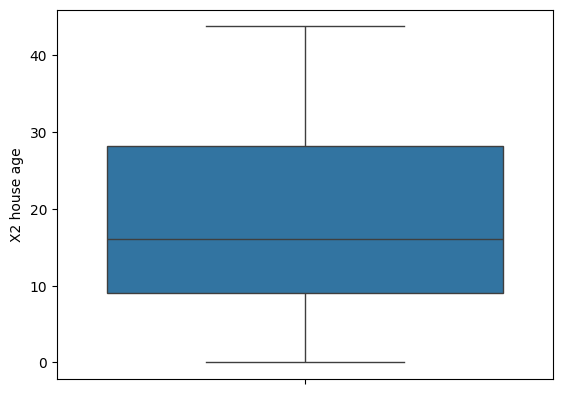

In [102]:
import seaborn as sns
sns.boxplot(y='X2 house age',data=df)

<Axes: ylabel='X3 distance to the nearest MRT station'>

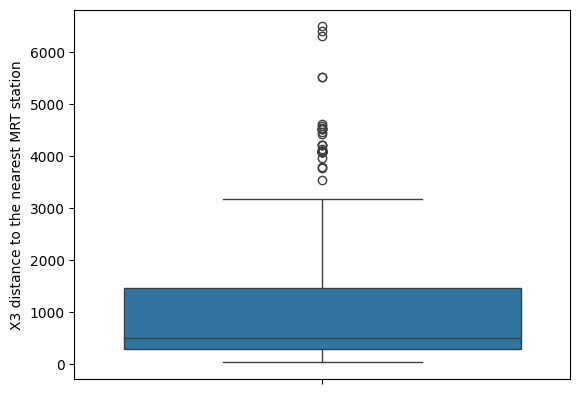

In [103]:
sns.boxplot(y='X3 distance to the nearest MRT station',data=df)

<Axes: ylabel='X4 number of convenience stores'>

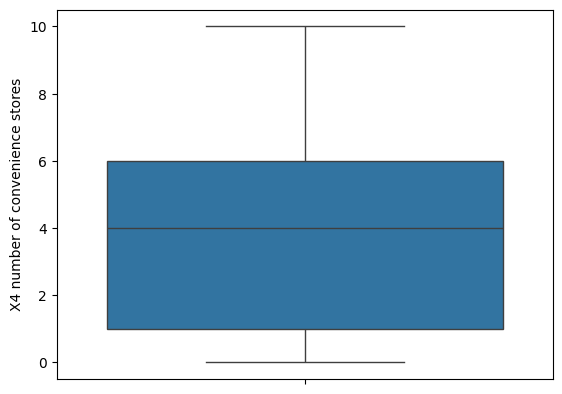

In [104]:
sns.boxplot(y='X4 number of convenience stores',data=df)

<Axes: ylabel='X5 latitude'>

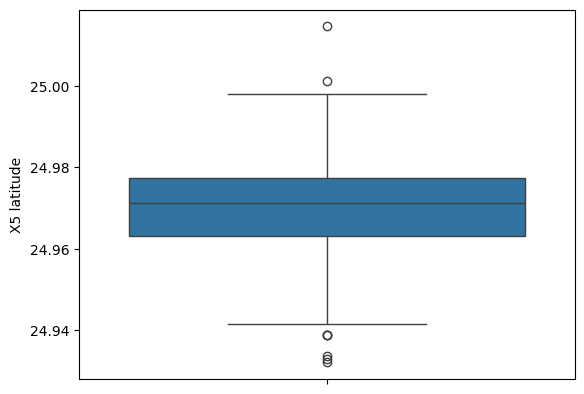

In [105]:
sns.boxplot(y='X5 latitude',data=df)

<Axes: ylabel='X6 longitude'>

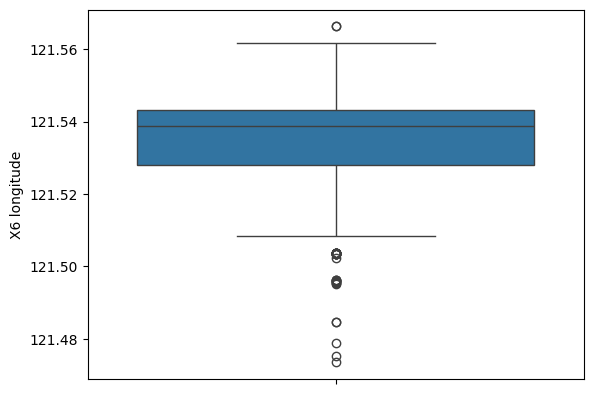

In [106]:
sns.boxplot(y='X6 longitude',data=df)

In [107]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calculate IQR for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove both lower and upper outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Columns with outliers
columns_with_outliers = ['X3 distance to the nearest MRT station', 'X5 latitude',"X6 longitude"]

# Apply the IQR outlier removal
df_clean = remove_outliers_iqr(df, columns_with_outliers)

In [108]:
# Plot boxplot for the cleaned data
# sns.boxplot(data=df_clean[columns_with_outliers])
# plt.title("Boxplots After Removing Both Top and Bottom Outliers")
# plt.show()

In [109]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [111]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [112]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE id',root_mean_squared_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('R2score is',r2_score(y_test,y_pred))

MAE is 6.170533333333334
MSE is 104.65407333333333
RMSE id 10.230057347509511
MAPE is 0.16347326323423342
R2score is 0.5458214538332421


[Text(0.5197376415256175, 0.9761904761904762, 'x[1] <= 826.827\nsquared_error = 164.901\nsamples = 289\nvalue = 37.937'),
 Text(0.21350890610704484, 0.9285714285714286, 'x[0] <= 12.05\nsquared_error = 93.118\nsamples = 183\nvalue = 44.948'),
 Text(0.3666232738163312, 0.9523809523809523, 'True  '),
 Text(0.09583714547118023, 0.8809523809523809, 'x[3] <= 24.974\nsquared_error = 65.771\nsamples = 62\nvalue = 51.361'),
 Text(0.032479414455626715, 0.8333333333333334, 'x[1] <= 80.642\nsquared_error = 34.54\nsamples = 29\nvalue = 47.79'),
 Text(0.007319304666056725, 0.7857142857142857, 'x[1] <= 36.522\nsquared_error = 24.027\nsamples = 6\nvalue = 54.6'),
 Text(0.0036596523330283625, 0.7380952380952381, 'squared_error = 1.0\nsamples = 2\nvalue = 48.7'),
 Text(0.010978956999085087, 0.7380952380952381, 'x[0] <= 4.0\nsquared_error = 9.432\nsamples = 4\nvalue = 57.55'),
 Text(0.007319304666056725, 0.6904761904761905, 'x[3] <= 24.958\nsquared_error = 3.376\nsamples = 3\nvalue = 56.033'),
 Text(0.00

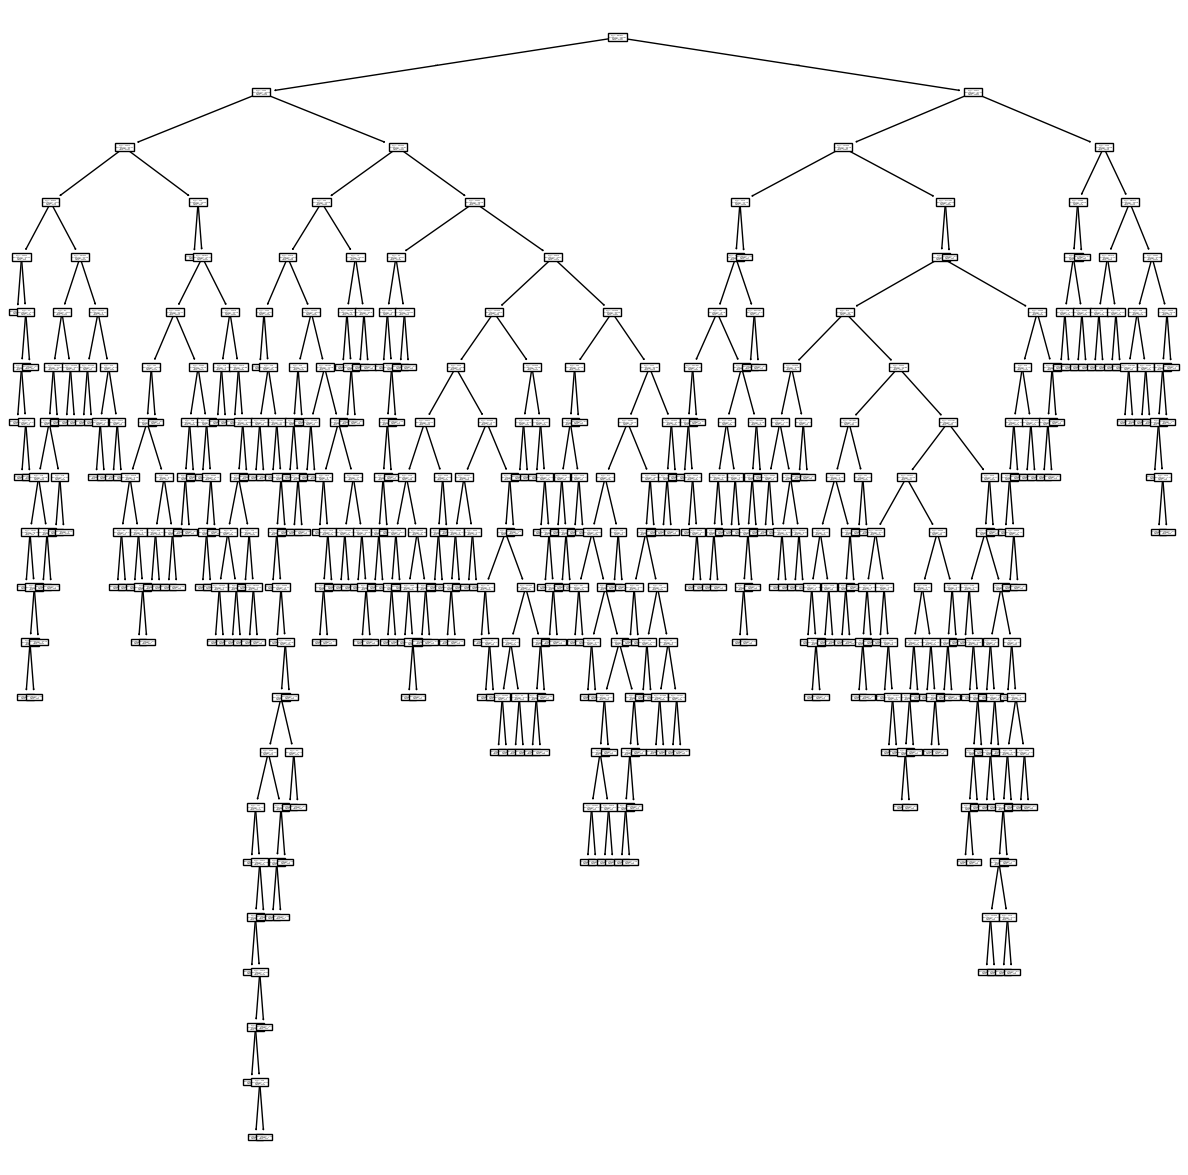

In [ ]:
from sklearn.model_selection import GridSearchCV
model1=DecisionTreeRegressor()
param={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best', 'random']}
clf=GridSearchCV(model1,param,cv=10,scoring='r2')
